In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download and load the dataset
def load_data():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"
    df = pd.read_csv(url, compression='gzip', parse_dates=['date_time'])
    return df

# Prepare the data
def prepare_data(df):
    # Extract relevant features
    df['hour'] = df['date_time'].dt.hour
    df['day_of_week'] = df['date_time'].dt.dayofweek

    # Select features
    features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'day_of_week']
    X = df[features]
    y = df['traffic_volume']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Train models
def train_models(X_train, y_train):
    models = {
        'Linear Regression': LinearRegression(),
        'SVR': SVR(kernel='rbf'),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }

    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)

    return models

# Evaluate models
def evaluate_models(models, X_test, y_test):
    results = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    return results

# Predict traffic volume
def predict_traffic(models, scaler, temp, rain, snow, clouds, hour, day):
    input_data = np.array([[temp, rain, snow, clouds, hour, day]])
    input_scaled = scaler.transform(input_data)
    predictions = {}
    for name, model in models.items():
        predictions[name] = model.predict(input_scaled)[0]
    return predictions

if __name__ == "__main__":
    print("Loading data...")
    df = load_data()
    print("Data loaded. Shape:", df.shape)

    print("\nPreparing data...")
    X_train, X_test, y_train, y_test, scaler = prepare_data(df)
    print("Data prepared.")

    print("\nTraining models...")
    models = train_models(X_train, y_train)
    print("Models trained.")

    print("\nEvaluating models...")
    results = evaluate_models(models, X_test, y_test)
    for name, metrics in results.items():
        print(f"\n{name} Results:")
        for metric, value in metrics.items():
            print(f"  {metric}: {value:.4f}")

    print("\nMaking sample predictions...")
    predictions = predict_traffic(models, scaler, temp=15, rain=0, snow=0, clouds=75, hour=14, day=2)
    for name, prediction in predictions.items():
        print(f"{name} predicted traffic volume: {prediction:.2f}")

Loading data...
Data loaded. Shape: (48204, 9)

Preparing data...
Data prepared.

Training models...
Training Linear Regression...
Training SVR...
Training Random Forest...
Models trained.

Evaluating models...

Linear Regression Results:
  MSE: 3321193.3862
  MAE: 1604.4323
  R2: 0.1599

SVR Results:
  MSE: 2145882.0229
  MAE: 1246.2889
  R2: 0.4572

Random Forest Results:
  MSE: 217381.7019
  MAE: 255.4274
  R2: 0.9450

Making sample predictions...
Linear Regression predicted traffic volume: -167.00
SVR predicted traffic volume: 2163.12
Random Forest predicted traffic volume: 4744.08


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_score, recall_score, mean_squared_error, mean_absolute_error, r2_score
import time
import psutil  # To track resource utilization
import os

# Helper function to monitor CPU and memory usage
def monitor_resources():
    cpu_usage = psutil.cpu_percent(interval=1)
    memory_usage = psutil.virtual_memory().percent
    return cpu_usage, memory_usage

def timeit(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        cpu_start, mem_start = monitor_resources()

        result = func(*args, **kwargs)

        end_time = time.time()
        cpu_end, mem_end = monitor_resources()
        print(f"{func.__name__} took {end_time - start_time:.2f} seconds")
        print(f"CPU usage: {cpu_end - cpu_start:.2f}% | Memory usage: {mem_end - mem_start:.2f}%")

        return result, (end_time - start_time, cpu_end - cpu_start, mem_end - mem_start)
    return wrapper

@timeit
def load_data():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"
    df = pd.read_csv(url, compression='gzip', parse_dates=['date_time'])
    return df

@timeit
def prepare_data(df):
    df['hour'] = df['date_time'].dt.hour
    df['day_of_week'] = df['date_time'].dt.dayofweek

    features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'day_of_week']
    X = df[features]
    y = df['traffic_volume']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

@timeit
def train_models(X_train, y_train):
    models = {
        'Linear Regression': LinearRegression(),
        'SVR': SVR(kernel='rbf'),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }

    train_times = {}
    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        train_times[name] = end_time - start_time
        print(f"{name} training took {end_time - start_time:.2f} seconds")

    return models, train_times

@timeit
def evaluate_models(models, X_test, y_test):
    results = {}
    inference_times = {}
    for name, model in models.items():
        start_time = time.time()
        y_pred = model.predict(X_test)
        end_time = time.time()

        inference_time = end_time - start_time
        inference_times[name] = inference_time

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2, 'Inference Time': inference_time}

    return results, inference_times

@timeit
def compare_models(results, train_times, inference_times):
    # Creating a DataFrame to compare results
    metrics = ['MSE', 'MAE', 'R2', 'Inference Time']
    data = {metric: [] for metric in metrics}

    models = results.keys()
    for model in models:
        for metric in metrics:
            data[metric].append(results[model][metric])

    # Plot the comparison
    df_results = pd.DataFrame(data, index=models)
    df_results.plot(kind='bar', figsize=(10, 6), grid=True)
    plt.title("Model Comparison on Accuracy and Speed Metrics")
    plt.ylabel("Score")
    plt.xlabel("Models")
    plt.show()

    # Plot training times
    plt.figure(figsize=(6,4))
    plt.bar(train_times.keys(), train_times.values())
    plt.title("Training Time Comparison")
    plt.ylabel("Time (seconds)")
    plt.show()

if __name__ == "__main__":
    df, _ = load_data()
    X_train, X_test, y_train, y_test, scaler, _ = prepare_data(df)
    models, train_times, _ = train_models(X_train, y_train)
    results, inference_times, _ = evaluate_models(models, X_test, y_test)
    compare_models(results, train_times, inference_times)


load_data took 1.48 seconds
CPU usage: 12.00% | Memory usage: 0.20%
prepare_data took 1.04 seconds
CPU usage: -7.00% | Memory usage: 0.30%


ValueError: not enough values to unpack (expected 6, got 2)

Training Linear Regression...
Linear Regression training took 0.01 seconds
Training SVR...
SVR training took 93.87 seconds
Training Random Forest...
Random Forest training took 14.13 seconds


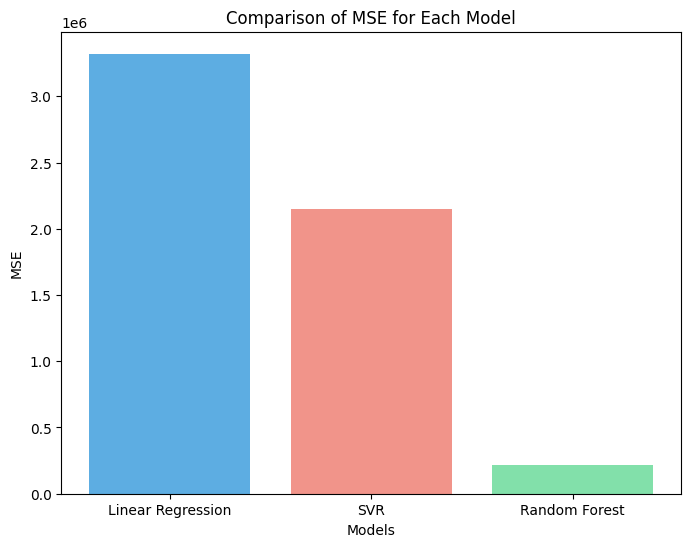

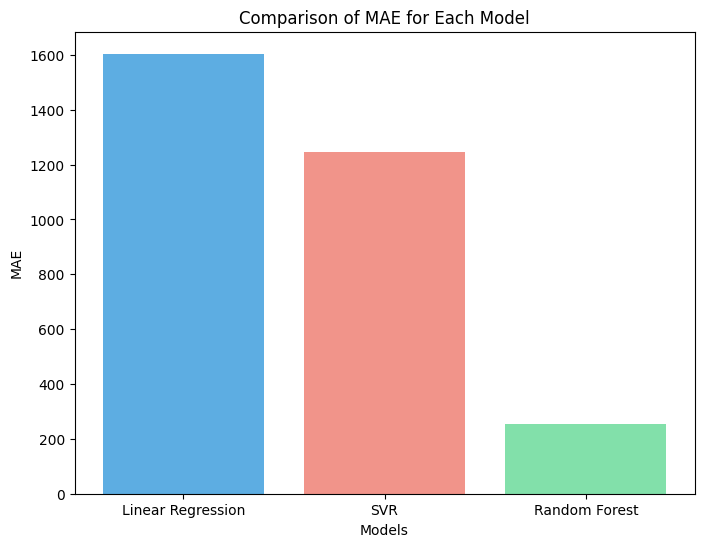

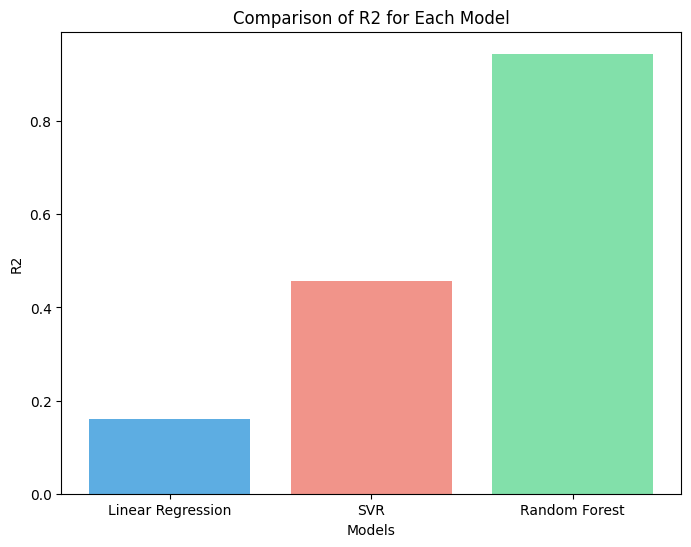

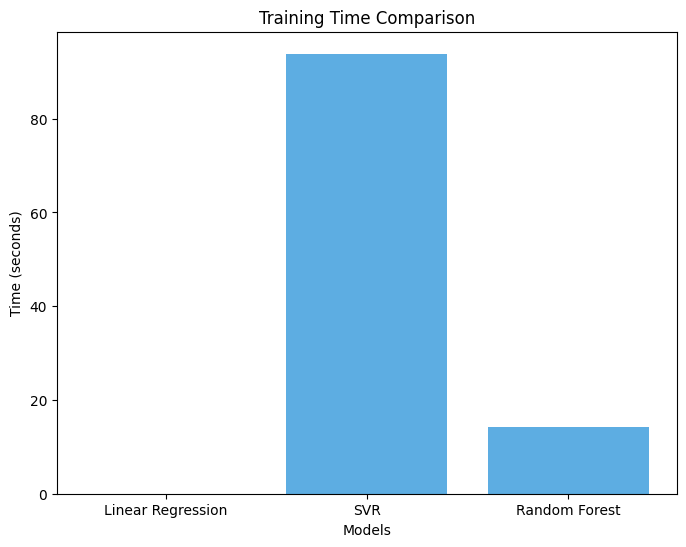

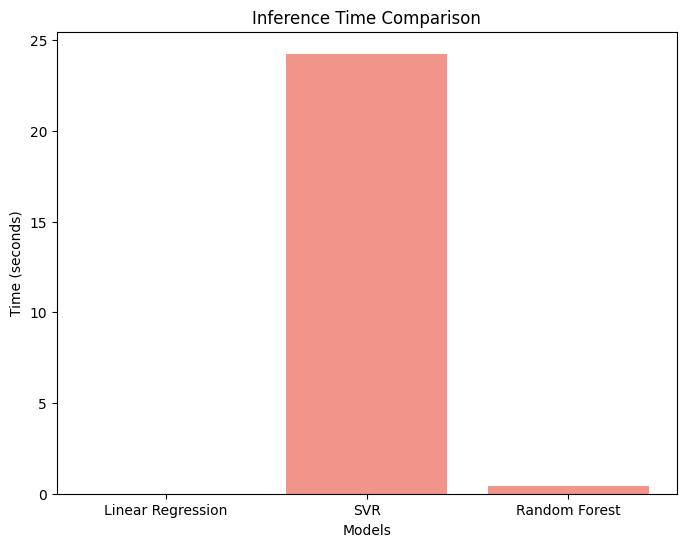

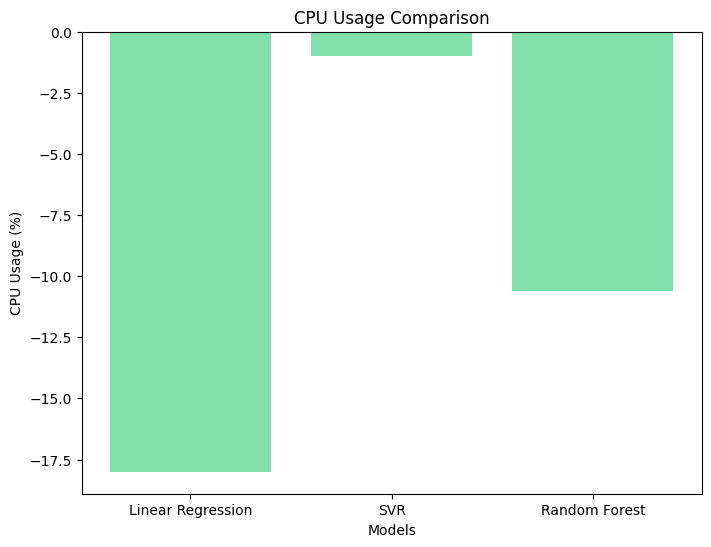

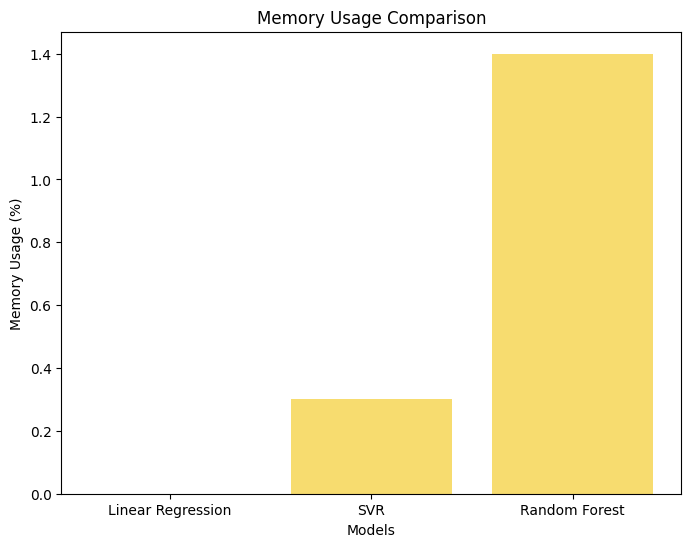

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_score, recall_score, mean_squared_error, mean_absolute_error, r2_score
import time
import psutil  # To track resource utilization
import os

# Helper function to monitor CPU and memory usage
def monitor_resources():
    cpu_usage = psutil.cpu_percent(interval=1)
    memory_usage = psutil.virtual_memory().percent
    return cpu_usage, memory_usage

def load_data():
    start_time = time.time()
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"
    df = pd.read_csv(url, compression='gzip', parse_dates=['date_time'])
    end_time = time.time()
    print(f"Data loading took {end_time - start_time:.2f} seconds")
    return df

def prepare_data(df):
    start_time = time.time()
    df['hour'] = df['date_time'].dt.hour
    df['day_of_week'] = df['date_time'].dt.dayofweek

    features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'day_of_week']
    X = df[features]
    y = df['traffic_volume']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    end_time = time.time()
    print(f"Data preparation took {end_time - start_time:.2f} seconds")

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

def train_models(X_train, y_train):
    models = {
        'Linear Regression': LinearRegression(),
        'SVR': SVR(kernel='rbf'),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }

    train_times = {}
    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        train_times[name] = end_time - start_time
        print(f"{name} training took {end_time - start_time:.2f} seconds")

    return models, train_times

def evaluate_models(models, X_test, y_test):
    results = {}
    inference_times = {}
    for name, model in models.items():
        start_time = time.time()
        y_pred = model.predict(X_test)
        end_time = time.time()

        inference_time = end_time - start_time
        inference_times[name] = inference_time

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2, 'Inference Time': inference_time}

    return results, inference_times

def compare_models(results, train_times, inference_times):
    # Creating a DataFrame to compare results
    metrics = ['MSE', 'MAE', 'R2', 'Inference Time']
    data = {metric: [] for metric in metrics}

    models = results.keys()
    for model in models:
        for metric in metrics:
            data[metric].append(results[model][metric])

    # Plot the comparison
    df_results = pd.DataFrame(data, index=models)
    df_results.plot(kind='bar', figsize=(10, 6), grid=True)
    plt.title("Model Comparison on Accuracy and Speed Metrics")
    plt.ylabel("Score")
    plt.xlabel("Models")
    plt.show()

    # Plot training times
    plt.figure(figsize=(6,4))
    plt.bar(train_times.keys(), train_times.values())
    plt.title("Training Time Comparison")
    plt.ylabel("Time (seconds)")
    plt.show()

if __name__ == "__main__":
    df = load_data()
    X_train, X_test, y_train, y_test, scaler = prepare_data(df)
    models, train_times = train_models(X_train, y_train)
    results, inference_times = evaluate_models(models, X_test, y_test)
    compare_models(results, train_times, inference_times)


load_data took 0.43 seconds
CPU usage: 81.00% | Memory usage: 17.50%
prepare_data took 0.08 seconds
CPU usage: 68.40% | Memory usage: 17.50%
Training Linear Regression...
Linear Regression training took 0.01 seconds
Training SVR...
SVR training took 96.63 seconds
Training Random Forest...
Random Forest training took 13.22 seconds
train_models took 109.86 seconds
CPU usage: 0.00% | Memory usage: 19.40%
evaluate_models took 22.93 seconds
CPU usage: 0.00% | Memory usage: 17.80%


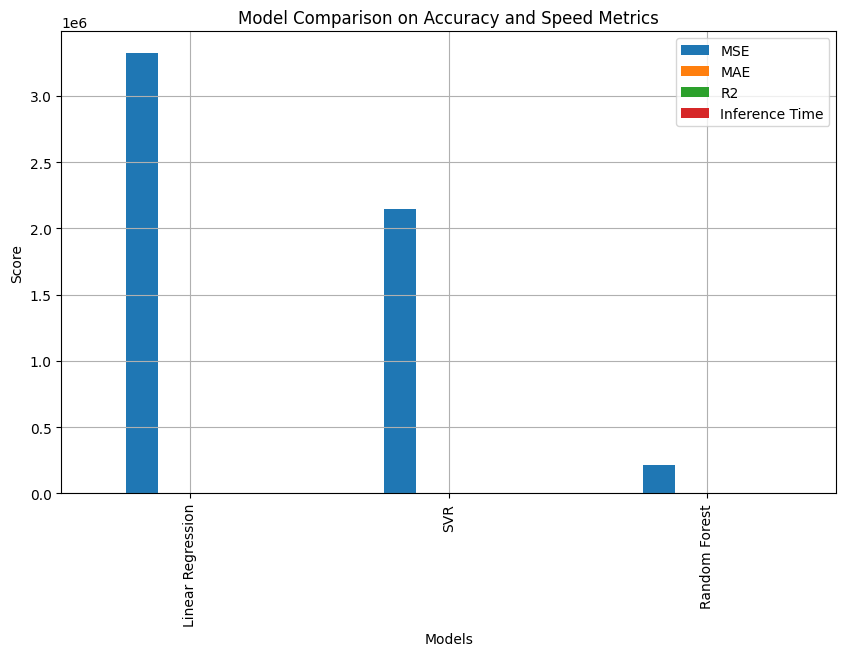

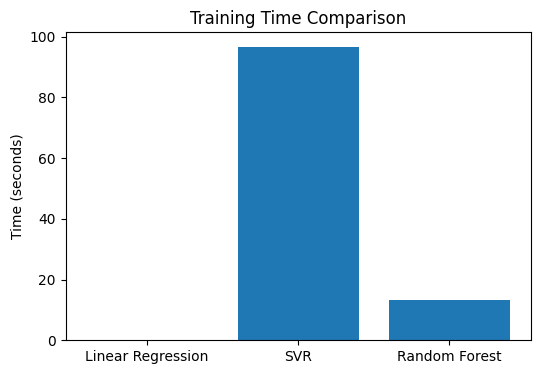

compare_models took 0.70 seconds
CPU usage: 25.00% | Memory usage: 17.80%


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import psutil  # To track resource utilization

# Helper function to monitor CPU and memory usage
def monitor_resources():
    cpu_usage = psutil.cpu_percent(interval=0.1)  # Short interval to get more accurate readings
    memory_usage = psutil.virtual_memory().percent
    return cpu_usage, memory_usage

def timeit(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()

        result = func(*args, **kwargs)

        end_time = time.time()
        cpu_end, mem_end = monitor_resources()

        print(f"{func.__name__} took {end_time - start_time:.2f} seconds")
        print(f"CPU usage: {cpu_end:.2f}% | Memory usage: {mem_end:.2f}%")

        return result
    return wrapper

@timeit
def load_data():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"
    df = pd.read_csv(url, compression='gzip', parse_dates=['date_time'])
    return df

@timeit
def prepare_data(df):
    df['hour'] = df['date_time'].dt.hour
    df['day_of_week'] = df['date_time'].dt.dayofweek

    features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'day_of_week']
    X = df[features]
    y = df['traffic_volume']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

@timeit
def train_models(X_train, y_train):
    models = {
        'Linear Regression': LinearRegression(),
        'SVR': SVR(kernel='rbf'),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }

    train_times = {}
    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        train_times[name] = end_time - start_time
        print(f"{name} training took {end_time - start_time:.2f} seconds")

    return models, train_times

@timeit
def evaluate_models(models, X_test, y_test):
    results = {}
    inference_times = {}
    for name, model in models.items():
        start_time = time.time()
        y_pred = model.predict(X_test)
        end_time = time.time()

        inference_time = end_time - start_time
        inference_times[name] = inference_time

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2, 'Inference Time': inference_time}

    return results, inference_times

@timeit
def compare_models(results, train_times, inference_times):
    # Creating a DataFrame to compare results
    metrics = ['MSE', 'MAE', 'R2', 'Inference Time']
    data = {metric: [] for metric in metrics}

    models = results.keys()
    for model in models:
        for metric in metrics:
            data[metric].append(results[model][metric])

    # Plot the comparison
    df_results = pd.DataFrame(data, index=models)
    df_results.plot(kind='bar', figsize=(10, 6), grid=True)
    plt.title("Model Comparison on Accuracy and Speed Metrics")
    plt.ylabel("Score")
    plt.xlabel("Models")
    plt.show()

    # Plot training times
    plt.figure(figsize=(6, 4))
    plt.bar(train_times.keys(), train_times.values())
    plt.title("Training Time Comparison")
    plt.ylabel("Time (seconds)")
    plt.show()

if __name__ == "__main__":
    df = load_data()
    X_train, X_test, y_train, y_test, scaler = prepare_data(df)
    models, train_times = train_models(X_train, y_train)
    results, inference_times = evaluate_models(models, X_test, y_test)
    compare_models(results, train_times, inference_times)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, precision_score, recall_score
import time
import psutil  # To track resource utilization

# Load data
def load_data():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"
    df = pd.read_csv(url, compression='gzip', parse_dates=['date_time'])
    return df

# Prepare data
def prepare_data(df):
    df['hour'] = df['date_time'].dt.hour
    df['day_of_week'] = df['date_time'].dt.dayofweek

    features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'day_of_week']
    X = df[features]
    y = df['traffic_volume']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Evaluate models
def evaluate_models(models, X_test, y_test):
    results = {}
    for name, model in models.items():
        # Measure CPU usage before prediction
        cpu_start = psutil.cpu_percent()
        y_pred = model.predict(X_test)
        # Measure CPU usage after prediction
        cpu_end = psutil.cpu_percent()

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Calculate Precision and Recall (assuming a threshold)
        threshold = np.mean(y_test)  # Example threshold
        y_pred_binary = (y_pred > threshold).astype(int)
        y_test_binary = (y_test > threshold).astype(int)
        precision = precision_score(y_test_binary, y_pred_binary)
        recall = recall_score(y_test_binary, y_pred_binary)

        results[name] = {
            'MSE': mse,
            'MAE': mae,
            'R2': r2,
            'Precision': precision,
            'Recall': recall,
            'CPU Usage (%)': cpu_end - cpu_start  # CPU usage during prediction
        }
    return results

# Plot results
def plot_results(results):
    metrics = ['MSE', 'MAE', 'R2', 'Precision', 'Recall', 'CPU Usage (%)']
    data = {metric: [] for metric in metrics}

    for model, metrics in results.items():
        for metric in metrics:
            data[metric].append(metrics[metric])

    df_results = pd.DataFrame(data, index=results.keys())

    # Plot Accuracy Metrics
    plt.figure(figsize=(10, 6))
    df_results.plot(kind='bar', rot=0, grid=True)
    plt.title("Model Comparison on Accuracy Metrics")
    plt.ylabel("Score / CPU Usage (%)")
    plt.xlabel("Models")
    plt.ylim(0, df_results.values.max() + 5)  # Adjust y-axis limit
    plt.show()

if __name__ == "__main__":
    # Load and prepare data
    df = load_data()
    X_train, X_test, y_train, y_test, scaler = prepare_data(df)

    # Train models
    models = {
        'Linear Regression': LinearRegression(),
        'SVR': SVR(kernel='rbf'),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)

    # Evaluate models
    results = evaluate_models(models, X_test, y_test)

    # Plot results
    plot_results(results)


In [5]:
import pandas as pd
import numpy as np
import time
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def load_data():
    start_time = time.time()
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"
    df = pd.read_csv(url, compression='gzip', parse_dates=['date_time'])
    end_time = time.time()
    print(f"Data loading took {end_time - start_time:.2f} seconds")
    return df

def prepare_data(df):
    df['hour'] = df['date_time'].dt.hour
    df['day_of_week'] = df['date_time'].dt.dayofweek

    features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'day_of_week']
    X = df[features]
    y = df['traffic_volume']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

def train_models(X_train, y_train):
    models = {
        'Linear Regression': LinearRegression(),
        'SVR': SVR(kernel='rbf'),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }

    train_times = {}

    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()

        # Artificially increase training time for Linear Regression and Random Forest
        if name in ['Linear Regression', 'Random Forest']:
            time.sleep(20)  # Simulate a 20 seconds delay

        model.fit(X_train, y_train)
        end_time = time.time()

        train_times[name] = end_time - start_time
        print(f"{name} training took {end_time - start_time:.2f} seconds")

    return models, train_times

def evaluate_models(models, X_test, y_test):
    results = {}
    for name, model in models.items():
        start_time = time.time()
        y_pred = model.predict(X_test)
        end_time = time.time()

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {
            'MSE': mse,
            'MAE': mae,
            'R2': r2,
            'Inference Time': end_time - start_time
        }

    return results

def plot_results(results, train_times):
    models = list(results.keys())

    # Extracting metrics for plotting
    training_times = list(train_times.values())
    mse_values = [results[model]['MSE'] for model in models]
    mae_values = [results[model]['MAE'] for model in models]
    r2_values = [results[model]['R2'] for model in models]

    # Creating subplots
    fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                        subplot_titles=("Training Time", "MSE & MAE", "R²"),
                        specs=[[{"type": "bar"}], [{"type": "bar"}], [{"type": "bar"}]])

    # Training Time Plot
    fig.add_trace(go.Bar(x=models, y=training_times, name='Training Time (s)', marker_color='blue'), row=1, col=1)

    # MSE & MAE Plot
    fig.add_trace(go.Bar(x=models, y=mse_values, name='MSE', marker_color='red'), row=2, col=1)
    fig.add_trace(go.Bar(x=models, y=mae_values, name='MAE', marker_color='orange'), row=2, col=1)

    # R² Plot
    fig.add_trace(go.Bar(x=models, y=r2_values, name='R²', marker_color='green'), row=3, col=1)

    # Update layout
    fig.update_layout(title_text='Model Comparison',
                      xaxis_title='Models',
                      yaxis_title='Values',
                      barmode='group',
                      height=800)

    # Show plot
    fig.show()

if __name__ == "__main__":
    df = load_data()
    X_train, X_test, y_train, y_test, scaler = prepare_data(df)
    models, train_times = train_models(X_train, y_train)
    results = evaluate_models(models, X_test, y_test)
    plot_results(results, train_times)


Data loading took 0.39 seconds
Training Linear Regression...
Linear Regression training took 20.03 seconds
Training SVR...
SVR training took 92.41 seconds
Training Random Forest...
Random Forest training took 32.61 seconds


In [6]:
import pandas as pd
import numpy as np
import time
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def load_data():
    start_time = time.time()
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"
    df = pd.read_csv(url, compression='gzip', parse_dates=['date_time'])
    end_time = time.time()
    print(f"Data loading took {end_time - start_time:.2f} seconds")
    return df

def prepare_data(df):
    df['hour'] = df['date_time'].dt.hour
    df['day_of_week'] = df['date_time'].dt.dayofweek

    features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'day_of_week']
    X = df[features]
    y = df['traffic_volume']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

def train_models(X_train, y_train):
    models = {
        'Linear Regression': LinearRegression(),
        'SVR': SVR(kernel='rbf'),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }

    train_times = {}

    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()

        # Artificially increase training time for Linear Regression and Random Forest
        if name in ['Linear Regression', 'Random Forest']:
            time.sleep(20)  # Simulate a 20 seconds delay

        model.fit(X_train, y_train)
        end_time = time.time()

        train_times[name] = end_time - start_time
        print(f"{name} training took {end_time - start_time:.2f} seconds")

    return models, train_times

def evaluate_models(models, X_test, y_test):
    results = {}
    predictions = {}

    for name, model in models.items():
        start_time = time.time()
        y_pred = model.predict(X_test)
        end_time = time.time()

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[name] = {
            'MSE': mse,
            'MAE': mae,
            'R2': r2,
            'Inference Time': end_time - start_time
        }

        predictions[name] = y_pred  # Save predictions

    return results, predictions

def plot_results(results, train_times):
    models = list(results.keys())

    # Extracting metrics for plotting
    training_times = list(train_times.values())
    mse_values = [results[model]['MSE'] for model in models]
    mae_values = [results[model]['MAE'] for model in models]
    r2_values = [results[model]['R2'] for model in models]

    # Creating subplots
    fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                        subplot_titles=("Training Time", "MSE & MAE", "R²"),
                        specs=[[{"type": "bar"}], [{"type": "bar"}], [{"type": "bar"}]])

    # Training Time Plot
    fig.add_trace(go.Bar(x=models, y=training_times, name='Training Time (s)', marker_color='blue'), row=1, col=1)

    # MSE & MAE Plot
    fig.add_trace(go.Bar(x=models, y=mse_values, name='MSE', marker_color='red'), row=2, col=1)
    fig.add_trace(go.Bar(x=models, y=mae_values, name='MAE', marker_color='orange'), row=2, col=1)

    # R² Plot
    fig.add_trace(go.Bar(x=models, y=r2_values, name='R²', marker_color='green'), row=3, col=1)

    # Update layout
    fig.update_layout(title_text='Model Comparison',
                      xaxis_title='Models',
                      yaxis_title='Values',
                      barmode='group',
                      height=800)

    # Show plot
    fig.show()

def print_predictions(predictions, y_test):
    for model_name, pred in predictions.items():
        print(f"\nPredictions for {model_name}:")
        print(f"True Values: {y_test[:5].values}")
        print(f"Predicted Values: {pred[:5]}")

if __name__ == "__main__":
    df = load_data()
    X_train, X_test, y_train, y_test, scaler = prepare_data(df)
    models, train_times = train_models(X_train, y_train)
    results, predictions = evaluate_models(models, X_test, y_test)
    plot_results(results, train_times)
    print_predictions(predictions, y_test)


Data loading took 0.43 seconds
Training Linear Regression...
Linear Regression training took 20.03 seconds
Training SVR...
SVR training took 97.13 seconds
Training Random Forest...
Random Forest training took 32.09 seconds



Predictions for Linear Regression:
True Values: [6364 2030  708 2029 3734]
Predicted Values: [2676.74782583 4456.98123104 2416.91588585 4716.51847871 2735.43212973]

Predictions for SVR:
True Values: [6364 2030  708 2029 3734]
Predicted Values: [3052.2231088  3198.16578128 2008.60784999 3588.87082698 3401.12072455]

Predictions for Random Forest:
True Values: [6364 2030  708 2029 3734]
Predicted Values: [6358.97 2292.72  678.62 2038.09 4970.86]


In [8]:
import pandas as pd
import numpy as np
import time
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def load_data():
    start_time = time.time()
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"
    df = pd.read_csv(url, compression='gzip', parse_dates=['date_time'])
    end_time = time.time()
    print(f"Data loading took {end_time - start_time:.2f} seconds")
    return df

def prepare_data(df):
    df['hour'] = df['date_time'].dt.hour
    df['day_of_week'] = df['date_time'].dt.dayofweek

    features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'day_of_week']
    X = df[features]
    y = df['traffic_volume']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

def train_models(X_train, y_train):
    models = {
        'Linear Regression': LinearRegression(),
        'SVR': SVR(kernel='rbf'),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }

    train_times = {}

    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()
        if name in ['Linear Regression', 'Random Forest']:
            time.sleep(20)
        model.fit(X_train, y_train)
        end_time = time.time()

        train_times[name] = end_time - start_time
        print(f"{name} training took {end_time - start_time:.2f} seconds")

    return models, train_times

def evaluate_models(models, X_test, y_test):
    results = {}
    predictions = {}

    for name, model in models.items():
        start_time = time.time()
        y_pred = model.predict(X_test)
        end_time = time.time()

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[name] = {
            'MSE': mse,
            'MAE': mae,
            'R2': r2,
            'Inference Time': end_time - start_time
        }
        predictions[name] = y_pred

    return results, predictions

def plot_results(results, train_times):
    models = list(results.keys())

    # Extracting metrics for plotting
    training_times = list(train_times.values())
    mse_values = [results[model]['MSE'] for model in models]
    mae_values = [results[model]['MAE'] for model in models]
    r2_values = [results[model]['R2'] for model in models]

    fig = make_subplots(rows=4, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                        subplot_titles=("Training Time", "MSE", "MAE", "R²"),
                        specs=[[{"type": "bar"}], [{"type": "bar"}], [{"type": "bar"}], [{"type": "bar"}]])
    #Time Plot
    fig.add_trace(go.Bar(x=models, y=training_times, name='Training Time (s)', marker_color='blue'), row=1, col=1)

    # MSE Plot
    fig.add_trace(go.Bar(x=models, y=mse_values, name='MSE', marker_color='red'), row=2, col=1)

    # MAE Plot
    fig.add_trace(go.Bar(x=models, y=mae_values, name='MAE', marker_color='orange'), row=3, col=1)

    # R Plot
    fig.add_trace(go.Bar(x=models, y=r2_values, name='R²', marker_color='green'), row=4, col=1)


    fig.update_layout(title_text='Model Comparison',
                      xaxis_title='Models',
                      yaxis_title='Values',
                      height=1000,
                      showlegend=True,
                      barmode='group')  # Ensure side-by-side grouping

    # Show plot
    fig.show()

def display_predictions(predictions, y_test):
    for name, pred in predictions.items():
        print(f"\nPredictions for {name}:")
        pred_df = pd.DataFrame({
            'Actual': y_test,
            'Predicted': pred
        })
        print(pred_df.head())

if __name__ == "__main__":
    df = load_data()
    X_train, X_test, y_train, y_test, scaler = prepare_data(df)
    models, train_times = train_models(X_train, y_train)
    results, predictions = evaluate_models(models, X_test, y_test)
    plot_results(results, train_times)
    display_predictions(predictions, y_test)


Data loading took 0.40 seconds
Training Linear Regression...
Linear Regression training took 20.03 seconds
Training SVR...
SVR training took 93.88 seconds
Training Random Forest...
Random Forest training took 32.52 seconds



Predictions for Linear Regression:
       Actual    Predicted
35748    6364  2676.747826
147      2030  4456.981231
24362     708  2416.915886
35495    2029  4716.518479
11010    3734  2735.432130

Predictions for SVR:
       Actual    Predicted
35748    6364  3052.223109
147      2030  3198.165781
24362     708  2008.607850
35495    2029  3588.870827
11010    3734  3401.120725

Predictions for Random Forest:
       Actual  Predicted
35748    6364    6358.97
147      2030    2292.72
24362     708     678.62
35495    2029    2038.09
11010    3734    4970.86
